In [186]:
pip install Quandl

In [187]:
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np
import quandl as qd

In [188]:
qd.ApiConfig.api_key = '*******'#obtained from---'https://www.quandl.com/tools/api'

In [189]:
ticker = pd.read_csv('/content/sample_data/XNSE_tickers.csv')#List of ticker and company from quandl

In [190]:
ticker

,ticker,issuer_name
0,20MICRONS,20 Microns Ltd (EQ20MICRONS)
1,21STCENMGM,Twentyfirst Century Management Services Ltd. (...
2,3IINFOTECH,3i Infotech Ltd. (EQ3IINFOTECH)
3,3MINDIA,3M India Ltd. (EQ3MINDIA)
4,3PLAND,3P Land Holdings Ltd. (EQ3PLAND)
...,...,...
3821,ZOTA,Zota Health Care Ltd (EQZOTA)
3822,ZUARI,Zuari Agro Chemicals Ltd (EQZUARI)
3823,ZUARIGLOB,Zuari Global Ltd (EQZUARIGLOB)
3824,ZYDUSWELL,Zydus Wellness Ltd (EQZYDUSWELL)


In [191]:
ticker['issuer_name'] = ticker['issuer_name'].apply(lambda x : x.split('(')[0])

In [192]:
ticker['stock_name'] = "NSE/"+ ticker['ticker']
stock_list = ticker['stock_name'].tolist()
stock_list = list(set(stock_list))

In [193]:
companies_dict = dict()
for i in range(31):
  companies_dict[ticker.iloc[i,1]] = ticker.iloc[i,2]

In [194]:
companies_dict 

{'20 Microns Ltd ': 'NSE/20MICRONS',
 '3M India Ltd. ': 'NSE/3MINDIA',
 '3P Land Holdings Ltd. ': 'NSE/3PLAND',
 '3i Infotech Ltd. ': 'NSE/3IINFOTECH',
 '5paisa Capital Ltd. ': 'NSE/5PAISA',
 '63 Moons Technologies Ltd. ': 'NSE/63MOONS',
 '8K Miles Software Services Ltd ': 'NSE/8KMILES',
 'A2Z Infra Engineering Ltd. ': 'NSE/A2ZINFRA',
 'ABB India Ltd ': 'NSE/ABB',
 'ABG Shipyard Ltd. ': 'NSE/ABGSHIP',
 'ABM International Ltd. ': 'NSE/ABMINTLTD',
 'ACC Ltd ': 'NSE/ACC',
 'Aakash Exploration Services Ltd. ': 'NSE/AAKASH',
 'Aarti Drugs Ltd. ': 'NSE/AARTIDRUGS',
 'Aarti Industries Ltd. ': 'NSE/AARTIIND',
 'Aarti Surfactants Ltd. ': 'NSE/AARTISURF',
 'Aarvee Denims & Exports Ltd ': 'NSE/AARVEEDEN',
 'Aarvi Encon Ltd. ': 'NSE/AARVI',
 'Aavas Financiers Ltd ': 'NSE/AAVAS',
 'Aban Offshore Ltd. ': 'NSE/ABAN',
 'Abbott India Ltd. ': 'NSE/ABBOTINDIA',
 'Abhishek Corporation Ltd ': 'NSE/ABHISHEK',
 'Accelya Solutions India Ltd. ': 'NSE/ACCELYA',
 'Aditya Birla Capital Ltd. ': 'NSE/ABCAPITAL',
 '

In [195]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [196]:
companies

[('20 Microns Ltd ', 'NSE/20MICRONS'),
 ('Twentyfirst Century Management Services Ltd. ', 'NSE/21STCENMGM'),
 ('3i Infotech Ltd. ', 'NSE/3IINFOTECH'),
 ('3M India Ltd. ', 'NSE/3MINDIA'),
 ('3P Land Holdings Ltd. ', 'NSE/3PLAND'),
 ('5paisa Capital Ltd. ', 'NSE/5PAISA'),
 ('63 Moons Technologies Ltd. ', 'NSE/63MOONS'),
 ('8K Miles Software Services Ltd ', 'NSE/8KMILES'),
 ('A2Z Infra Engineering Ltd. ', 'NSE/A2ZINFRA'),
 ('Aakash Exploration Services Ltd. ', 'NSE/AAKASH'),
 ('Aarti Drugs Ltd. ', 'NSE/AARTIDRUGS'),
 ('Aarti Industries Ltd. ', 'NSE/AARTIIND'),
 ('Aarti Surfactants Ltd. ', 'NSE/AARTISURF'),
 ('Aarvee Denims & Exports Ltd ', 'NSE/AARVEEDEN'),
 ('Aarvi Encon Ltd. ', 'NSE/AARVI'),
 ('Aavas Financiers Ltd ', 'NSE/AAVAS'),
 ('Aban Offshore Ltd. ', 'NSE/ABAN'),
 ('ABB India Ltd ', 'NSE/ABB'),
 ('Abbott India Ltd. ', 'NSE/ABBOTINDIA'),
 ('Aditya Birla Capital Ltd. ', 'NSE/ABCAPITAL'),
 ('Aditya Birla Chemicals ', 'NSE/ABCIL'),
 ('Aditya Birla Fashion & Retail Ltd. ', 'NSE/ABFRL_R

In [197]:
start_date = '2018-01-04'
end_date = '2019-01-04'

In [198]:
companies_dict.values()

dict_values(['NSE/20MICRONS', 'NSE/21STCENMGM', 'NSE/3IINFOTECH', 'NSE/3MINDIA', 'NSE/3PLAND', 'NSE/5PAISA', 'NSE/63MOONS', 'NSE/8KMILES', 'NSE/A2ZINFRA', 'NSE/AAKASH', 'NSE/AARTIDRUGS', 'NSE/AARTIIND', 'NSE/AARTISURF', 'NSE/AARVEEDEN', 'NSE/AARVI', 'NSE/AAVAS', 'NSE/ABAN', 'NSE/ABB', 'NSE/ABBOTINDIA', 'NSE/ABCAPITAL', 'NSE/ABCIL', 'NSE/ABFRL_RE', 'NSE/ABGSHIP', 'NSE/ABHISHEK', 'NSE/ABIRLANUVO', 'NSE/ABMINTLTD', 'NSE/ABSLNN50ET', 'NSE/ACC', 'NSE/ACCELYA'])

In [199]:
mydata = qd.get(list(companies_dict.values()))

In [200]:
panel_data = mydata[mydata.index>=start_date]

In [201]:
panel_data.dropna(axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
panel_data

,NSE/20MICRONS - Open,NSE/20MICRONS - High,NSE/20MICRONS - Low,NSE/20MICRONS - Last,NSE/20MICRONS - Close,NSE/20MICRONS - Total Trade Quantity,NSE/20MICRONS - Turnover (Lacs),NSE/3IINFOTECH - Open,NSE/3IINFOTECH - High,NSE/3IINFOTECH - Low,NSE/3IINFOTECH - Last,NSE/3IINFOTECH - Close,NSE/3IINFOTECH - Total Trade Quantity,NSE/3IINFOTECH - Turnover (Lacs),NSE/3MINDIA - Open,NSE/3MINDIA - High,NSE/3MINDIA - Low,NSE/3MINDIA - Last,NSE/3MINDIA - Close,NSE/3MINDIA - Total Trade Quantity,NSE/3MINDIA - Turnover (Lacs),NSE/5PAISA - Open,NSE/5PAISA - High,NSE/5PAISA - Low,NSE/5PAISA - Last,NSE/5PAISA - Close,NSE/5PAISA - Total Trade Quantity,NSE/5PAISA - Turnover (Lacs),NSE/63MOONS - Open,NSE/63MOONS - High,NSE/63MOONS - Low,NSE/63MOONS - Last,NSE/63MOONS - Close,NSE/63MOONS - Total Trade Quantity,NSE/63MOONS - Turnover (Lacs),NSE/8KMILES - Open,NSE/8KMILES - High,NSE/8KMILES - Low,NSE/8KMILES - Last,NSE/8KMILES - Close,...,NSE/ABB - Low,NSE/ABB - Last,NSE/ABB - Close,NSE/ABB - Total Trade Quantity,NSE/ABB - Turnover (Lacs),NSE/ABBOTINDIA - Open,NSE/ABBOTINDIA - High,NSE/ABBOTINDIA - Low,NSE/ABBOTINDIA - Last,NSE/ABBOTINDIA - Close,NSE/ABBOTINDIA - Total Trade Quantity,NSE/ABBOTINDIA - Turnover (Lacs),NSE/ABCAPITAL - Open,NSE/ABCAPITAL - High,NSE/ABCAPITAL - Low,NSE/ABCAPITAL - Last,NSE/ABCAPITAL - Close,NSE/ABCAPITAL - Total Trade Quantity,NSE/ABCAPITAL - Turnover (Lacs),NSE/ABGSHIP - Open,NSE/ABGSHIP - High,NSE/ABGSHIP - Low,NSE/ABGSHIP - Last,NSE/ABGSHIP - Close,NSE/ABGSHIP - Total Trade Quantity,NSE/ABGSHIP - Turnover (Lacs),NSE/ACC - Open,NSE/ACC - High,NSE/ACC - Low,NSE/ACC - Last,NSE/ACC - Close,NSE/ACC - Total Trade Quantity,NSE/ACC - Turnover (Lacs),NSE/ACCELYA - Open,NSE/ACCELYA - High,NSE/ACCELYA - Low,NSE/ACCELYA - Last,NSE/ACCELYA - Close,NSE/ACCELYA - Total Trade Quantity,NSE/ACCELYA - Turnover (Lacs)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-04,59.45,63.20,58.60,62.75,62.60,812025.0,500.57,7.60,8.40,7.60,8.40,8.40,60821732.0,4900.84,19400.50,19750.00,19152.00,19500.00,19449.80,1597.0,311.97,332.10,348.65,331.50,339.20,337.70,15178.0,51.33,120.00,121.45,117.3,117.60,117.95,286030.0,340.80,885.00,891.30,855.00,866.00,860.00,...,1415.00,1428.80,1433.30,154339.0,2220.31,5489.0,5489.00,5420.00,5440.00,5430.85,887.0,48.28,185.00,185.55,183.50,184.20,184.00,2105382.0,3878.82,13.90,13.90,13.40,13.50,13.65,15258.0,2.09,1779.95,1808.00,1770.00,1794.50,1801.35,278240.0,4969.44,1455.55,1468.90,1439.00,1462.75,1452.10,6678.0,96.96
2018-01-05,64.80,67.00,63.00,63.25,63.60,1129498.0,736.47,8.70,8.80,8.30,8.80,8.80,24010030.0,2077.41,19440.00,19600.05,19255.35,19350.00,19367.50,867.0,168.55,345.95,352.00,327.00,332.00,330.70,20668.0,69.17,116.00,121.90,116.0,119.00,118.65,532162.0,637.78,866.00,892.00,860.05,861.75,863.05,...,1430.00,1436.95,1435.10,99155.0,1428.90,5450.0,5450.00,5353.50,5412.00,5383.15,2130.0,114.98,185.00,186.00,184.20,185.10,184.85,3143911.0,5820.74,13.50,13.90,13.05,13.80,13.60,20397.0,2.75,1801.10,1820.40,1795.60,1814.90,1809.95,312489.0,5650.51,1453.00,1473.85,1438.00,1470.00,1465.95,2512.0,36.58
2018-01-08,64.00,64.25,61.05,62.25,61.65,298210.0,185.80,8.90,9.15,8.55,8.70,8.75,19114665.0,1684.15,19461.00,19650.00,19100.00,19200.00,19194.05,2200.0,424.70,339.95,347.20,332.40,347.20,347.20,14044.0,48.36,120.30,122.90,118.0,119.35,119.60,477727.0,575.64,874.00,878.00,856.10,860.85,859.15,...,1430.00,1435.00,1437.60,130805.0,1883.09,5400.0,5400.00,5334.05,5335.00,5340.55,6513.0,349.13,185.90,186.90,182.65,183.30,183.10,4784106.0,8800.60,13.80,13.90,13.30,13.50,13.60,17792.0,2.45,1816.00,1827.95,1800.00,1827.00,1825.00,189168.0,3442.39,1465.00,1472.00,1447.60,1447.60,1451.20,1931.0,28.13
2018-01-09,62.15,64.70,60.00,62.35,62.50,509757.0,320.11,8.85,8.85,8.35,8.35,8.35,13662718.0,1157.15,19300.00,19300.05,18874.60,18899.00,18967.95,1203.0,229.35,364.55,364.55,352.00,364.55,364.55,45529.0,165.17,120.60,120.65,116.4,116.70,116.90,255445.0,302.32,865.00,882.00,841.60,849.0

In [203]:
panel_data.columns

Index(['NSE/20MICRONS - Open', 'NSE/20MICRONS - High', 'NSE/20MICRONS - Low',
       'NSE/20MICRONS - Last', 'NSE/20MICRONS - Close',
       'NSE/20MICRONS - Total Trade Quantity',
       'NSE/20MICRONS - Turnover (Lacs)', 'NSE/3IINFOTECH - Open',
       'NSE/3IINFOTECH - High', 'NSE/3IINFOTECH - Low',
       ...
       'NSE/ACC - Close', 'NSE/ACC - Total Trade Quantity',
       'NSE/ACC - Turnover (Lacs)', 'NSE/ACCELYA - Open', 'NSE/ACCELYA - High',
       'NSE/ACCELYA - Low', 'NSE/ACCELYA - Last', 'NSE/ACCELYA - Close',
       'NSE/ACCELYA - Total Trade Quantity', 'NSE/ACCELYA - Turnover (Lacs)'],
      dtype='object', length=119)

In [204]:
companies = []
for i in panel_data.columns:
  if i.split('-')[0].split('/')[1] not in companies:    
    companies.append(i.split('-')[0].split('/')[1])
companies

['20MICRONS ',
 '3IINFOTECH ',
 '3MINDIA ',
 '5PAISA ',
 '63MOONS ',
 '8KMILES ',
 'A2ZINFRA ',
 'AARTIDRUGS ',
 'AARTIIND ',
 'AARVEEDEN ',
 'ABAN ',
 'ABB ',
 'ABBOTINDIA ',
 'ABCAPITAL ',
 'ABGSHIP ',
 'ACC ',
 'ACCELYA ']

In [205]:
stock_open = pd.DataFrame()
stock_close = pd.DataFrame()

In [206]:
i = 'NSE/20MICRONS - Open'

In [207]:
i.split('-')[0].split('/')[1]

'20MICRONS '

In [208]:
panel_data.loc[:,i]

Date
2018-01-04    59.45
2018-01-05    64.80
2018-01-08    64.00
2018-01-09    62.15
2018-01-10    62.60
              ...  
2018-12-31    42.20
2019-01-01    42.05
2019-01-02    45.50
2019-01-03    44.05
2019-01-04    43.50
Name: NSE/20MICRONS - Open, Length: 247, dtype: float64

In [209]:
for i in panel_data.columns:
  if i.split('-')[1]==' Open':
    stock_open.loc[:,i.split('-')[0].split('/')[1]] = panel_data.loc[:,i]

In [210]:
stock_open

,20MICRONS,3IINFOTECH,3MINDIA,5PAISA,63MOONS,8KMILES,A2ZINFRA,AARTIDRUGS,AARTIIND,AARVEEDEN,ABAN,ABB,ABBOTINDIA,ABCAPITAL,ABGSHIP,ACC,ACCELYA
2018-01-04,59.45,7.60,19400.50,332.10,120.00,885.00,47.25,716.00,1144.00,49.40,208.80,1420.0,5489.0,185.00,13.90,1779.95,1455.55
2018-01-05,64.80,8.70,19440.00,345.95,116.00,866.00,46.85,744.00,1150.00,57.05,210.00,1432.0,5450.0,185.00,13.50,1801.10,1453.00
2018-01-08,64.00,8.90,19461.00,339.95,120.30,874.00,46.00,745.50,1170.60,53.25,217.00,1444.0,5400.0,185.90,13.80,1816.00,1465.00
2018-01-09,62.15,8.85,19300.00,364.55,120.60,865.00,45.40,767.25,1142.50,53.35,221.25,1444.6,5340.0,184.50,13.30,1823.00,1451.00
2018-01-10,62.60,8.40,18967.95,372.40,118.40,850.00,43.75,777.70,1145.00,52.40,221.00,1420.2,5325.0,184.40,13.00,1812.05,1441.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,42.20,3.65,21298.10,239.00,101.40,144.85,13.00,575.00,1442.00,25.15,75.05,1315.0,7540.0,100.30,2.00,1486.00,947.70
2019-01-01,42.05,3.65,20854.95,257.90,98.95,141.20,13.00,576.65,1450.00,25.65,75.00,1335.0,7550.0,100.60,2.00,1516.90,943.80
2019-01-02,45.50,3.65,20666.35,270.75,98.90,141.80,13.25,577.30,1453.95,25.80,74.00,1320.0,7580.0,99.80,2.00,1487.85,945.05
2019-01-03,44.05,3.70,20160.00,280.00,97.40,138.00,12.65,572.95,1444.10,26.55,74.50,1318.9,7520.3,99.45,2.05,1483.95,951.05


In [211]:
for i in panel_data.columns:
  if i.split('-')[1]==' Close':
    stock_close.loc[:,i.split('-')[0].split('/')[1]] = panel_data.loc[:,i]

In [212]:
stock_close

,20MICRONS,3IINFOTECH,3MINDIA,5PAISA,63MOONS,8KMILES,A2ZINFRA,AARTIDRUGS,AARTIIND,AARVEEDEN,ABAN,ABB,ABBOTINDIA,ABCAPITAL,ABGSHIP,ACC,ACCELYA
2018-01-04,62.60,8.40,19449.80,337.70,117.95,860.00,46.55,740.40,1149.35,53.70,209.60,1433.30,5430.85,184.00,13.65,1801.35,1452.10
2018-01-05,63.60,8.80,19367.50,330.70,118.65,863.05,45.50,737.55,1170.60,53.25,215.55,1435.10,5383.15,184.85,13.60,1809.95,1465.95
2018-01-08,61.65,8.75,19194.05,347.20,119.60,859.15,45.20,732.15,1149.80,52.45,220.05,1437.60,5340.55,183.10,13.60,1825.00,1451.20
2018-01-09,62.50,8.35,18967.95,364.55,116.90,847.10,43.60,770.35,1140.40,51.30,218.30,1419.30,5296.80,183.75,13.30,1812.05,1448.00
2018-01-10,60.95,8.35,18468.55,356.10,115.75,846.25,43.65,763.95,1121.00,51.50,251.45,1415.40,5263.35,183.20,13.40,1816.55,1450.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,42.20,3.60,20824.40,245.65,98.80,140.95,13.05,576.65,1443.70,25.20,74.75,1336.75,7516.65,100.00,2.10,1508.10,949.95
2019-01-01,44.25,3.65,20666.35,257.90,99.60,142.30,13.00,575.65,1448.60,26.05,74.50,1319.20,7580.05,100.10,2.05,1488.80,950.00
2019-01-02,44.05,3.65,19985.75,270.75,97.20,138.80,13.00,575.10,1450.70,27.05,74.10,1319.25,7527.05,99.25,2.05,1483.95,949.40
2019-01-03,43.45,3.60,19990.25,284.25,96.45,133.90,13.05,575.20,1429.15,28.00,73.50,1308.95,7471.95,98.25,1.95,1452.25,948.25


In [213]:
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

In [214]:
stock_close

array([[6.260000e+01, 6.360000e+01, 6.165000e+01, ..., 4.405000e+01,
        4.345000e+01, 4.225000e+01],
       [8.400000e+00, 8.800000e+00, 8.750000e+00, ..., 3.650000e+00,
        3.600000e+00, 3.650000e+00],
       [1.944980e+04, 1.936750e+04, 1.919405e+04, ..., 1.998575e+04,
        1.999025e+04, 2.035740e+04],
       ...,
       [1.365000e+01, 1.360000e+01, 1.360000e+01, ..., 2.050000e+00,
        1.950000e+00, 1.900000e+00],
       [1.801350e+03, 1.809950e+03, 1.825000e+03, ..., 1.483950e+03,
        1.452250e+03, 1.469100e+03],
       [1.452100e+03, 1.465950e+03, 1.451200e+03, ..., 9.494000e+02,
        9.482500e+02, 9.441500e+02]])

In [215]:
row, col = stock_close.shape

In [216]:
row

17

In [217]:
col

247

In [218]:
movements = np.zeros([row, col])

In [219]:
movements                                                              

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [220]:
for i in range(row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

for i in range(0, len(companies)-1):
   print('Company: {}, Change: {}'.format(companies[i], sum(movements[i][:])))

Company: 20MICRONS , Change: -110.95000000000002
Company: 3IINFOTECH , Change: -11.199999999999996
Company: 3MINDIA , Change: -9278.550000000021
Company: 5PAISA , Change: -311.95
Company: 63MOONS , Change: -46.05000000000001
Company: 8KMILES , Change: -1033.65
Company: A2ZINFRA , Change: -42.15000000000002
Company: AARTIDRUGS , Change: -545.7
Company: AARTIIND , Change: -61.90000000000032
Company: AARVEEDEN , Change: -93.24999999999994
Company: ABAN , Change: -183.0499999999999
Company: ABB , Change: -944.5999999999988
Company: ABBOTINDIA , Change: -1161.100000000004
Company: ABCAPITAL , Change: -131.80000000000007
Company: ABGSHIP , Change: -12.999999999999991
Company: ACC , Change: -593.650000000001


In [221]:
movements

array([[ 3.1500e+00, -1.2000e+00, -2.3500e+00, ..., -1.4500e+00,
        -6.0000e-01, -1.2500e+00],
       [ 8.0000e-01,  1.0000e-01, -1.5000e-01, ...,  0.0000e+00,
        -1.0000e-01,  5.0000e-02],
       [ 4.9300e+01, -7.2500e+01, -2.6695e+02, ..., -6.8060e+02,
        -1.6975e+02,  3.4600e+02],
       ...,
       [-2.5000e-01,  1.0000e-01, -2.0000e-01, ...,  5.0000e-02,
        -1.0000e-01,  0.0000e+00],
       [ 2.1400e+01,  8.8500e+00,  9.0000e+00, ..., -3.9000e+00,
        -3.1700e+01,  1.1100e+01],
       [-3.4500e+00,  1.2950e+01, -1.3800e+01, ...,  4.3500e+00,
        -2.8000e+00, -7.5000e-01]])

In [222]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


In [223]:
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

In [224]:
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, max_iter=1000)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [225]:
labels = pipeline.predict(movements)
df = pd.DataFrame({'labels': labels, 'companies': companies})
print(df.sort_values('labels')) 

    labels    companies
3        0      5PAISA 
4        1     63MOONS 
6        1    A2ZINFRA 
7        1  AARTIDRUGS 
10       1        ABAN 
16       2     ACCELYA 
12       3  ABBOTINDIA 
11       4         ABB 
13       5   ABCAPITAL 
0        5   20MICRONS 
15       5         ACC 
1        5  3IINFOTECH 
14       6     ABGSHIP 
5        7     8KMILES 
9        7   AARVEEDEN 
2        8     3MINDIA 
8        9    AARTIIND 


In [226]:
from sklearn.decomposition import PCA

In [227]:
reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

In [228]:
df = pd.DataFrame({'labels': labels, 'companies': companies})

In [229]:
print(df.sort_values('labels'))

    labels    companies
6        0    A2ZINFRA 
10       0        ABAN 
2        1     3MINDIA 
14       2     ABGSHIP 
15       3         ACC 
11       3         ABB 
3        4      5PAISA 
9        4   AARVEEDEN 
0        5   20MICRONS 
4        5     63MOONS 
13       5   ABCAPITAL 
1        6  3IINFOTECH 
5        6     8KMILES 
7        6  AARTIDRUGS 
8        7    AARTIIND 
16       8     ACCELYA 
12       9  ABBOTINDIA 


In [230]:
reduced_data

array([[-1.01120638e-02, -5.41829554e-02],
       [-2.26482883e-01,  3.08647599e-02],
       [ 6.01906661e-01, -3.77989695e-02],
       [-1.77103212e-01, -1.43931988e-01],
       [-7.40426446e-04, -1.31367176e-01],
       [-2.99891371e-01,  7.49768400e-02],
       [-2.20148608e-01,  1.95346640e-01],
       [-3.08815630e-01,  5.53134189e-03],
       [-6.79108313e-02, -4.31255813e-01],
       [-2.72509739e-01, -1.63172503e-01],
       [-3.05057674e-01,  2.94584375e-01],
       [ 1.94673681e-01, -1.85152024e-01],
       [ 5.57343814e-01,  1.11782213e-01],
       [-9.95696364e-02, -1.15565032e-01],
       [ 1.40419537e-01,  8.76499186e-01],
       [ 1.77455861e-01, -2.13067018e-01],
       [ 3.16542522e-01, -1.14091876e-01]])

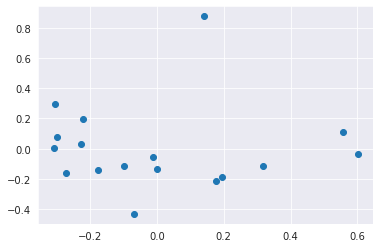

In [231]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],)

In [232]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


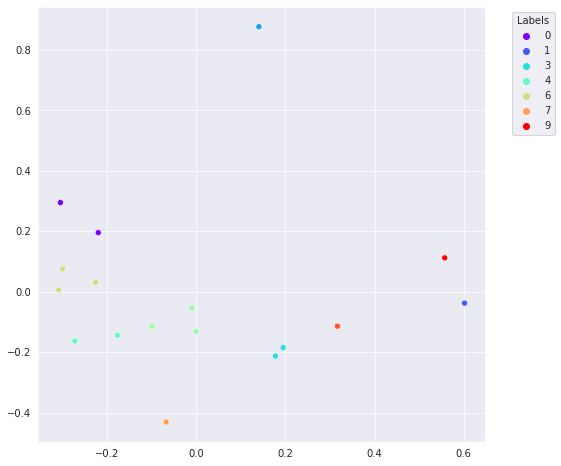

In [244]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.scatterplot(reduced_data[:,0],reduced_data[:,1],hue=labels,palette='rainbow',sizes=20)
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

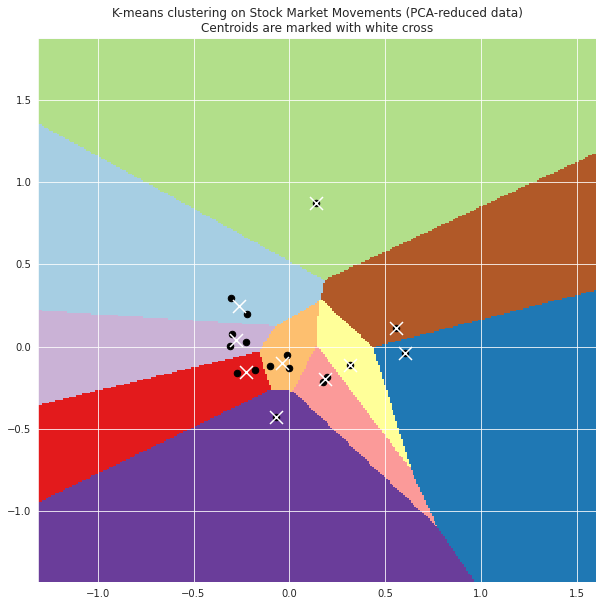

In [234]:
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=13)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
